In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, ndcg_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("../datasets/resources.csv")

difficulty_map = {'easy': 1, 'medium': 2, 'hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_map)

type_map = {'video': 0, 'article': 1}
df['type_encoded'] = df['type'].map(type_map)

df['score'] = df['rating'] * df['popularity']

df = df.sort_values(by="popularity", ascending=False).reset_index(drop=True)

df.head()


,title,url,topic,length,popularity,rating,difficulty,type,difficulty_encoded,type_encoded,score
0,Setting up a Python Development Environment in...,https://www.youtube.com/watch?v=xFciV6Ew5r4,Introduction to Python,19,50324,3.4,easy,video,1,0,171101.6
1,Python YouTube API Tutorial: Sort a Playlist b...,https://www.youtube.com/watch?v=1KO_HZtHOWI,Introduction to Python,36,50221,3.1,easy,video,1,0,155685.1
2,Python Tutorial: String Formatting - Advanced ...,https://www.youtube.com/watch?v=vTX3IwquFkc,Introduction to Python,29,50034,4.4,easy,video,1,0,220149.6
3,Matplotlib Tutorial (Part 7): Scatter Plots,https://www.youtube.com/watch?v=zZZ_RCwp49g,Introduction to Python,58,49523,3.3,easy,video,1,0,163425.9
4,Python Django Tutorial: Full-Featured Web App ...,https://www.youtube.com/watch?v=-s7e_Fy6NRU,Introduction to Python,58,48203,3.3,easy,video,1,0,159069.9


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               150 non-null    object 
 1   url                 150 non-null    object 
 2   topic               150 non-null    object 
 3   length              150 non-null    int64  
 4   popularity          150 non-null    int64  
 5   rating              150 non-null    float64
 6   difficulty          150 non-null    object 
 7   type                150 non-null    object 
 8   difficulty_encoded  150 non-null    int64  
 9   type_encoded        150 non-null    int64  
 10  score               150 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 13.0+ KB


title                 0
url                   0
topic                 0
length                0
popularity            0
rating                0
difficulty            0
type                  0
difficulty_encoded    0
type_encoded          0
score                 0
dtype: int64

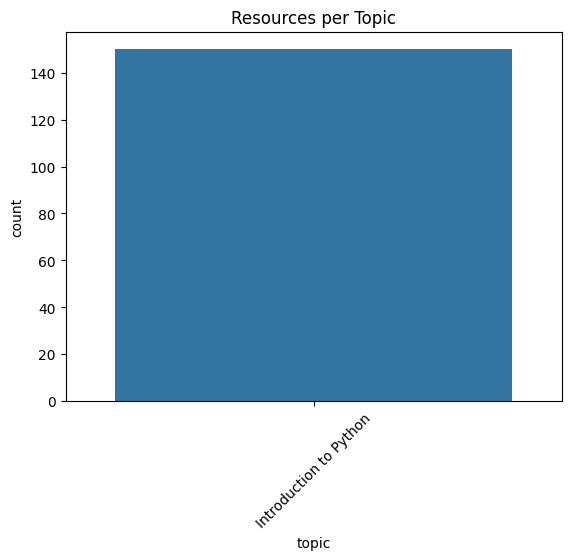

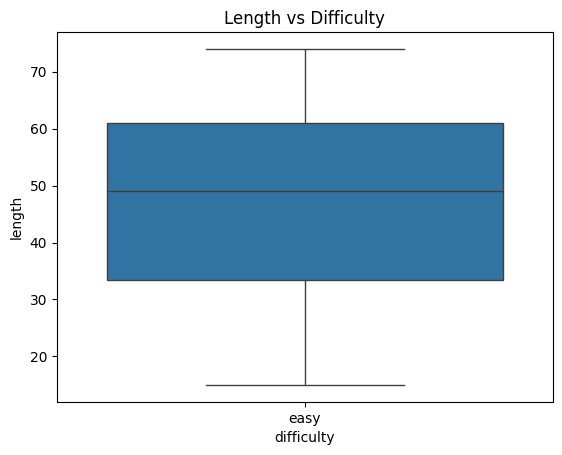

In [5]:
sns.countplot(x="topic", data=df)
plt.title("Resources per Topic")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="difficulty", y="length", data=df)
plt.title("Length vs Difficulty")
plt.show()


In [6]:
X = df[['length', 'difficulty_encoded', 'type_encoded', 'popularity', 'rating']]
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,length,difficulty_encoded,type_encoded,popularity,rating
22,44,1,0,42949,3.9
15,48,1,0,44793,4.3
65,73,1,0,29098,4.8
11,69,1,0,46594,4.4
42,50,1,0,38995,4.5


In [7]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with XGBoost: {mse:.2f}")


Mean Squared Error with XGBoost: 62617421.07


In [8]:
y_true = y_test.values.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)

ndcg = ndcg_score(y_true, y_pred_reshaped)
print(f"NDCG Score: {ndcg:.4f}")


NDCG Score: 0.9935


In [9]:
import joblib

joblib.dump(model, '../models/xgb_ranker.pkl')
print("XGBoost model saved successfully.")


XGBoost model saved successfully.
